In [27]:
#importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r"D:\datases\Clean_Dataset.csv")
df=df.drop(['Unnamed: 0'],axis=1)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
#dataset info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [4]:
#checking for missing valuse:
df.isnull().sum()*100/len(df)

airline             0.0
flight              0.0
source_city         0.0
departure_time      0.0
stops               0.0
arrival_time        0.0
destination_city    0.0
class               0.0
duration            0.0
days_left           0.0
price               0.0
dtype: float64

In [5]:
#categorical columns:
categorical_columns=df.dtypes=='object'
categorical=df.loc[:,categorical_columns]
categorical

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business


In [6]:
#Numerical columns:
numerical_columns=df.dtypes!='object'
numerical=df.loc[:,numerical_columns]
numerical

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955
...,...,...,...
300148,10.08,49,69265
300149,10.42,49,77105
300150,13.83,49,79099
300151,10.00,49,81585


In [7]:
for i in categorical:
    print(categorical[i].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64
destination_city


In [8]:
#dropping unwanted columns:
df=df.drop(['flight'],axis=1)

In [9]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [10]:
for i in df.columns:
    print(i)

airline
source_city
departure_time
stops
arrival_time
destination_city
class
duration
days_left
price


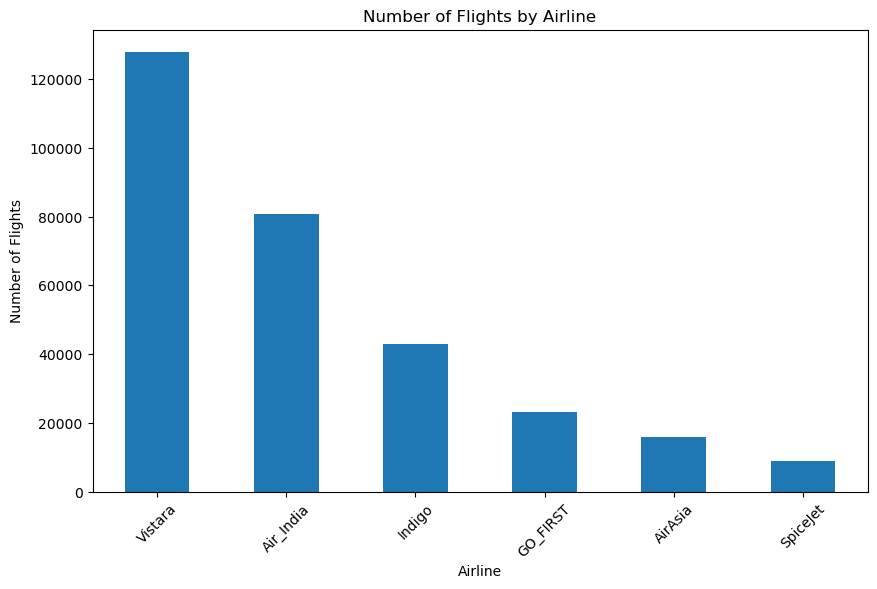

In [11]:
#Bar Chart: Number of Flights by Airline
plt.figure(figsize=(10, 6))
df['airline'].value_counts().plot(kind='bar')
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

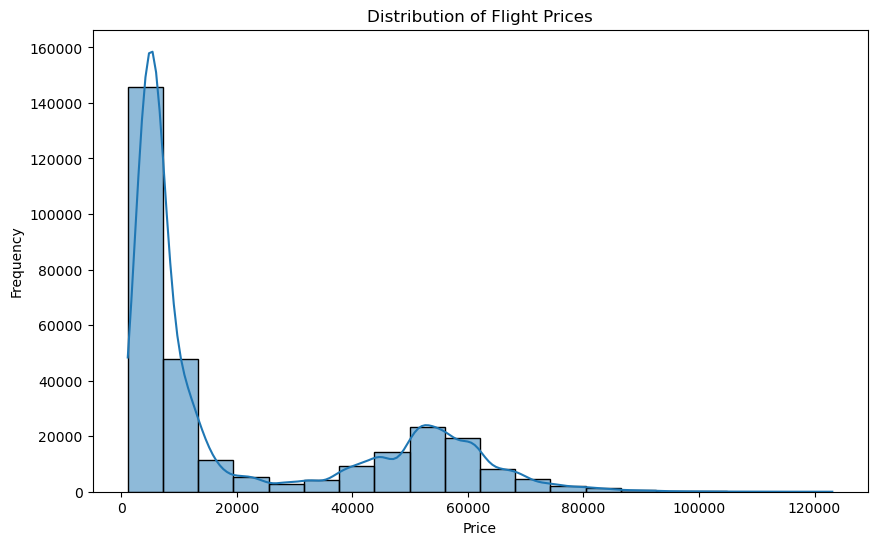

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

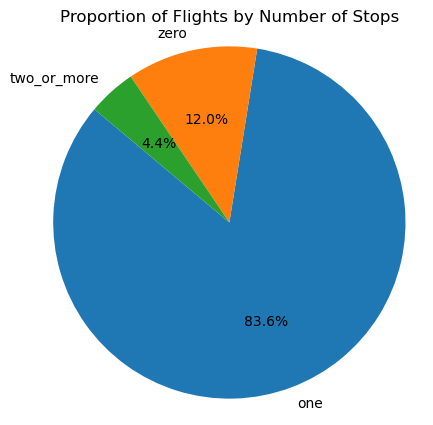

In [13]:
#Proportion of Stops:
counts = df['stops'].value_counts()
labels = counts.index
sizes = counts.values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Flights by Number of Stops')
plt.axis('equal')  
plt.show()

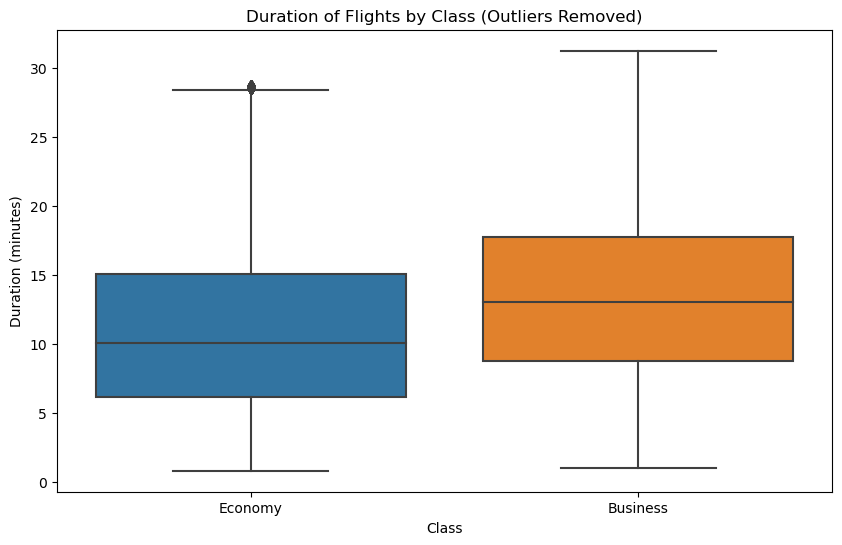

In [14]:
# Create the boxplot with outliers removed
# Calculate the quartiles and IQR for each class
Q1 = df.groupby('class')['duration'].quantile(0.25)
Q3 = df.groupby('class')['duration'].quantile(0.75)
IQR = Q3 - Q1
# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = pd.DataFrame()
for class_type in df['class'].unique():
    class_data = df[df['class'] == class_type]
    filtered_data = class_data[(class_data['duration'] >= lower_bound[class_type]) & 
                               (class_data['duration'] <= upper_bound[class_type])]
    filtered_df = pd.concat([filtered_df, filtered_data])
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='class', y='duration')
plt.title('Duration of Flights by Class (Outliers Removed)')
plt.xlabel('Class')
plt.ylabel('Duration (minutes)')
plt.show()


In [15]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [18]:
#one hot encoding:
df = pd.get_dummies(df)
df = df.astype(int)

In [19]:
df

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2,1,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2,1,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2,1,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2,1,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10,49,69265,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
300149,10,49,77105,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
300150,13,49,79099,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
300151,10,49,81585,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [24]:
X=df.drop(['price'],axis=1)
X

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,2,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10,49,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
300149,10,49,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
300150,13,49,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
300151,10,49,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0


In [25]:
Y=df['price']
Y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int32

In [26]:
#Training and Spliting 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [28]:
# Decision Tree Regression
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)
dt_predictions = dt_regressor.predict(x_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print("Decision Tree Mean Squared Error:", dt_mse)
print("Decision Tree Mean Absolute Error:", dt_mae)
print("Decision Tree R^2 Score:", dt_r2)

Decision Tree Mean Squared Error: 17904058.94815196
Decision Tree Mean Absolute Error: 1624.9368917052022
Decision Tree R^2 Score: 0.9651563190223061


In [29]:
# RandomForest Regression
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)
rf_predictions = rf_regressor.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("RandomForest Mean Squared Error:", rf_mse)
print("RandomForest Mean Absolute Error:", rf_mae)
print("RandomForest R^2 Score:", rf_r2)

RandomForest Mean Squared Error: 12156441.249827227
RandomForest Mean Absolute Error: 1482.2997250387052
RandomForest R^2 Score: 0.9763419478253684


In [30]:
# GradientBoosting Regression
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)
gb_predictions = gb_regressor.predict(x_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("GradientBoosting Mean Squared Error:", gb_mse)
print("GradientBoosting Mean Absolute Error:", gb_mae)
print("GradientBoosting R^2 Score:", gb_r2)

GradientBoosting Mean Squared Error: 24622097.566304047
GradientBoosting Mean Absolute Error: 2954.563810778105
GradientBoosting R^2 Score: 0.9520821219877349


In [31]:
# AdaBoost Regression
ab_regressor = AdaBoostRegressor()
ab_regressor.fit(x_train, y_train)
ab_predictions = ab_regressor.predict(x_test)
ab_mse = mean_squared_error(y_test, ab_predictions)
ab_mae = mean_absolute_error(y_test, ab_predictions)
ab_r2 = r2_score(y_test, ab_predictions)

print("AdaBoost Mean Squared Error:", ab_mse)
print("AdaBoost Mean Absolute Error:", ab_mae)
print("AdaBoost R^2 Score:", ab_r2)

AdaBoost Mean Squared Error: 39235783.55192373
AdaBoost Mean Absolute Error: 4086.713252835843
AdaBoost R^2 Score: 0.9236419446030594


In [32]:
# Linear Regression
lr_regressor = LinearRegression()
lr_regressor.fit(x_train, y_train)
lr_predictions = lr_regressor.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)
print("Linear Regression R^2 Score:", lr_r2)

Linear Regression Mean Squared Error: 45148172.88497759
Linear Regression Mean Absolute Error: 4554.242187720754
Linear Regression R^2 Score: 0.912135648274756


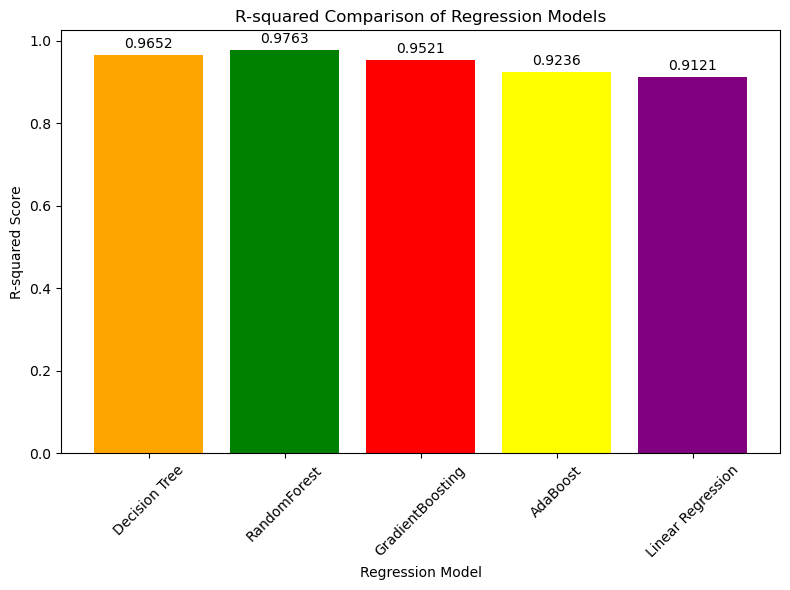

In [34]:
model_names = ["Decision Tree", "RandomForest", "GradientBoosting", "AdaBoost", "Linear Regression"]
r2_scores = [dt_r2, rf_r2, gb_r2, ab_r2, lr_r2]

# Create a bar chart
plt.figure(figsize=(8, 6)) 
bars = plt.bar(model_names, r2_scores, color=['orange', 'green', 'red', 'yellow', 'purple'])
for bar, score in zip(bars, r2_scores):
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{score:.4f}", ha='center', va='bottom')
plt.xlabel("Regression Model")
plt.ylabel("R-squared Score")
plt.title("R-squared Comparison of Regression Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
